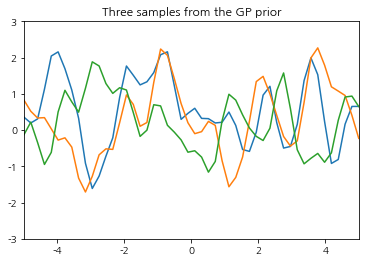

In [1]:
import numpy as np
import matplotlib.pyplot as pl

# Test data
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param)

# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3)))

# Now let's plot the 3 sampled functions.
pl.plot(Xtest, f_prior)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP prior')
pl.show()

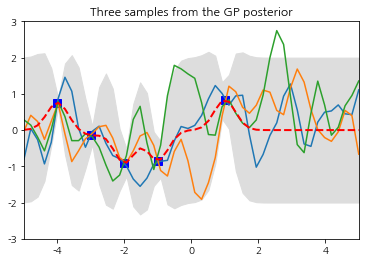

In [2]:
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')
pl.show()


# This is a test set
x1min = 0
x1max = 16
x2min = 0
x2max = 16
x1 = np.linspace(x1min, x1max)
x2 = np.linspace(x2min, x2max)
x_test =(np.array([x1, x2])).T



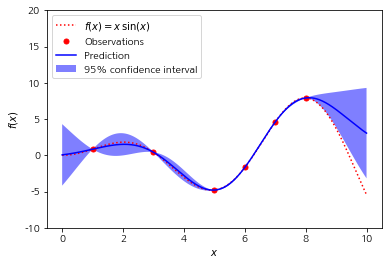

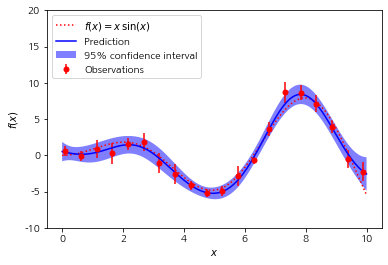

In [112]:
print(__doc__)

# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

# ----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

Text(0, 0.5, 'y')

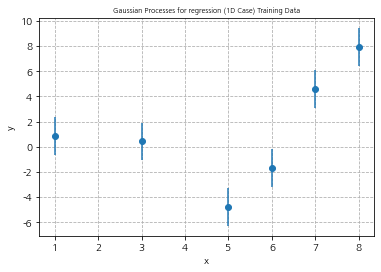

In [5]:
from numpy.linalg import inv

import matplotlib.pyplot as plt
import numpy as np

X = np.array([1., 3., 5., 6., 7., 8.])

Y = X * np.sin(X)

X = X[:,np.newaxis]


sigma_n = 1.5

plt.grid(True,linestyle='--')

plt.errorbar(X, Y, yerr=sigma_n, fmt='o')

plt.title('Gaussian Processes for regression (1D Case) Training Data', fontsize=7)

plt.xlabel('x')
plt.ylabel('y')


In [6]:
# Calculate the covariance matrix K
sigma_f = 10.0

l = 1.0

X_dim1 = X.shape[0]

D = np.zeros((X_dim1,X_dim1))

K = np.zeros((X_dim1,X_dim1))


D = X - X.T

K = sigma_f**2*np.exp((-D*D)/(2.0*l**2))

np.fill_diagonal(K, K.diagonal() +sigma_n**2 )

In [7]:
# Make a prediction on 1 new point
x_new = 2.0 # 2.5

D_new = np.zeros((X_dim1))

K_new = np.zeros((X_dim1))

D_new = X - x_new

K_new = sigma_f**2*np.exp((-D_new*D_new)/(2.0*l**2))

K_inv = inv(K)

m1 = np.dot(K_new[:,0],K_inv)

y_predict = np.dot(m1,Y)

print(y_predict)

0.9519920401356502


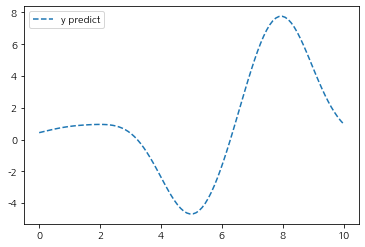

In [8]:
# Make a prediction on a grid
X_new = np.linspace(0,10,100)

Y_predict = []

Y_VAR_predict = []

for x_new in X_new:

    D_new = np.zeros((X_dim1))

    K_new = np.zeros((X_dim1))

    D_new = X - x_new

    K_new = sigma_f**2*np.exp((-D_new*D_new)/(2.0*l**2))

    m1 = np.dot(K_new[:,0],K_inv)

    y_predict = np.dot(m1,Y)

    Y_predict.append(y_predict)

    y_var_predict = K[0,0] - K_new[:,0].dot(K_inv.dot(np.transpose(K_new[:,0])))

    Y_VAR_predict.append(y_var_predict)

plt.plot(X_new,Y_predict,'--',label='y predict')

plt.legend()


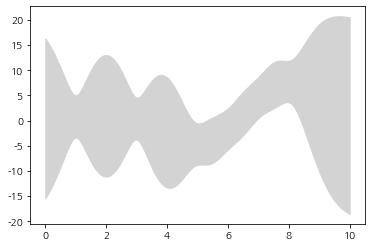

In [9]:
# Plot the variance
plt.fill_between(X_new, 
[i-1.96*np.sqrt(Y_VAR_predict[idx]) for idx,i in enumerate(Y_predict)], 
[i+1.96*np.sqrt(Y_VAR_predict[idx]) for idx,i in enumerate(Y_predict)],color='#D3D3D3')

plt.savefig('gaussian_processes_1d_fig_03.png', bbox_inches='tight')

2.763963703850036
(array([26], dtype=int64), array([84], dtype=int64))
4.300000000000001
1.4000000000000006


Text(0, 0.5, '$\\sigma_f$')

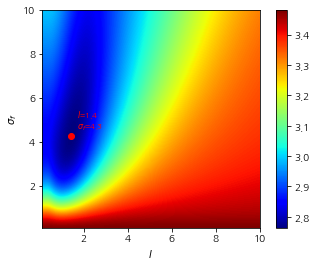

In [10]:
#  Using a grid search
#  To find "good" $\sigma_f$ and $l$ a solution is to use a grid search:

from pylab import figure, cm

sigma_f, l = np.meshgrid(np.arange(0.1,10.0, 0.05), np.arange(0.1,10.0, 0.05))

sigma_f_dim1 = sigma_f.shape[0]
sigma_f_dim2 = sigma_f.shape[1]

Z = np.zeros((sigma_f_dim1,sigma_f_dim2))

D = X - X.T

for i in np.arange(sigma_f_dim1):
    for j in np.arange(sigma_f_dim2):

        K = np.zeros((X_dim1,X_dim1))

        K = sigma_f[i,j]**2*np.exp((-D*D)/(2.0*l[i,j]**2))

        np.fill_diagonal(K, K.diagonal() +sigma_n**2 )

        K_inv = inv(K)

        m1 = np.dot(K_inv,Y)

        part1 = -0.5 * np.dot(Y.T,m1)

        part2 = - 0.5 * np.log(np.linalg.det(K))

        part3 = - X_dim1 / 2.0 * np.log(2*np.pi)

        Z[i,j] = part1 + part2 + part3

Z = np.log(-Z)

print(np.min(Z))
print(np.where(Z == Z.min()))

min_indexes = np.where(Z == Z.min())

sigma_f_opt = sigma_f[min_indexes[0],min_indexes[1]][0]
l_opt = l[min_indexes[0],min_indexes[1]][0]

print(sigma_f_opt)
print(l_opt)

fig = plt.figure()

ax = fig.add_subplot(111)

plt.imshow( Z.T, interpolation='bilinear', origin='lower', cmap=cm.jet, extent=[0.1,10.0,0.1,10.0])

plt.colorbar()

plt.scatter(l_opt,sigma_f_opt,color='r')

ax.text(l_opt+0.3,sigma_f_opt+0.3,
r'$l$='+str(round(l_opt,2))+"\n"+
r'$\sigma_f$='+str(round(sigma_f_opt,2))
,color='red',fontsize=8)

plt.xlabel(r'$l$')
plt.ylabel(r'$\sigma_f$')


In [211]:
x = [0, -50, 0, 50, -50, 50, -50, 0, 50, -100, 0, 100, 0]
y = [0, 50, 50, 50, 0, 0, -50, -50, -50, 0, 100, 0, -100]
thk = [115, 120, 125, 125, 123, 128, 127, 128, 129, 132, 135, 135, 130]

x_train = []
for i in range(len(x)) :
    x_train.append([x[i],y[i]])

x_train = np.array(x_train)
y_train = np.array(thk)

X = [-np.sqrt(100**2-30**2), -np.sqrt((100**2)/2), -30,
     30, np.sqrt((100**2)/2), np.sqrt(100**2-30**2), 
     -np.sqrt(100**2-30**2), -np.sqrt((100**2)/2), -30,
     30, np.sqrt((100**2)/2), np.sqrt(100**2-30**2),
    -np.sqrt(100**2-50**2),-50,50,np.sqrt(100**2-50**2),
    -np.sqrt(100**2-50**2),-50,50,np.sqrt(100**2-50**2)]

Y = [30,np.sqrt((100**2)/2),np.sqrt(100**2-30**2),
     np.sqrt(100**2-30**2),np.sqrt((100**2)/2),30,
     -30,-np.sqrt((100**2)/2),-np.sqrt(100**2-30**2),
     -np.sqrt(100**2-30**2),-np.sqrt((100**2)/2),-30,
    50,np.sqrt(100**2-50**2),np.sqrt(100**2-50**2),50,
    -50,-np.sqrt(100**2-50**2),-np.sqrt(100**2-50**2),-50]

x_test = []
for i in range(len(X)) :
    x_test.append([X[i],Y[i]]) 
x_test = np.array(x_test)

d:\python\lib\site-packages\sklearn\gaussian_process\kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


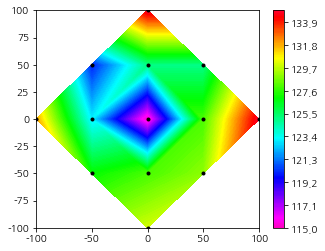

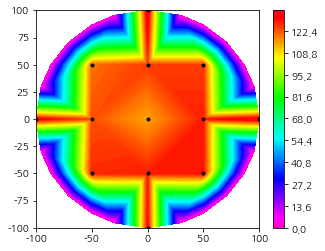

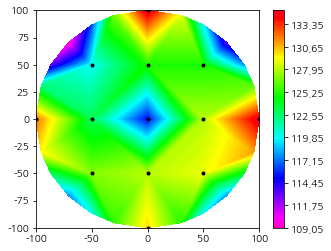

In [214]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor

'''
# This is a test set
x1min = 0
x1max = 16
x2min = 0
x2max = 16
x1 = np.linspace(x1min, x1max)
x2 = np.linspace(x2min, x2max)
x_test =(np.array([x1, x2])).T
'''
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

gp1 = GaussianProcessRegressor()
gp2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

gp1.fit(x_train, y_train)
gp2.fit(x_train, y_train)

y_test1 = gp1.predict(x_test)
y_test2 = gp2.predict(x_test) 

x_merge = np.concatenate((x_train, x_test),axis=0)
thk_merge1 = np.concatenate((y_train, y_test1),axis=0)
thk_merge2 = np.concatenate((y_train, y_test2),axis=0)

x1 = []
y1 = []
z1 = []
z2 = []
for i in range(len(x_merge)) :
    x1.append(x_merge[i,0])
    y1.append(x_merge[i,1])
    z1.append(thk_merge1[i])
    z2.append(thk_merge2[i])
    
# print(y_test1, y_test2, sep='\n\n')
    
# train plot
plt.figure(figsize=(5,4))
plt.tricontourf(x,y,thk, 200, cmap='gist_rainbow_r')
plt.plot(x,y, 'k.')
plt.colorbar()

# test1 plot
plt.figure(figsize=(5,4))
plt.tricontourf(x1,y1,z1, 200, cmap='gist_rainbow_r')
plt.plot(x,y, 'k.')
plt.colorbar()

# test2 plot
plt.figure(figsize=(5,4))
plt.tricontourf(x1,y1,z2, 200, cmap='gist_rainbow_r')
plt.plot(x,y, 'k.')
plt.colorbar()